In [18]:
# Import required libraries 
import numpy as np 
import pandas as pd 

In [20]:
# Import the dataset 
dataset = pd.read_csv('telcochurndata.csv') 
# Glance at the first five record
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [21]:
# Print all the features of the data 
dataset.columns 

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [22]:
# Churners vs Non-Churners 
dataset['Churn'].value_counts() 

Churn
False    572
True      95
Name: count, dtype: int64

In [23]:
# Group data by 'Churn' and compute the mean 
print(dataset.groupby('Churn')['Customer service calls'].mean()) 
#Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.


Churn
False    1.437063
True     2.326316
Name: Customer service calls, dtype: float64


In [24]:
# Count the number of churners and non-churners by State 
print(dataset.groupby('State')['Churn'].value_counts()) 


State  Churn
AK     False     9
AL     False    13
       True      1
AR     False     8
AZ     False    18
                ..
WI     True      3
WV     False    15
       True      3
WY     False    10
       True      1
Name: count, Length: 93, dtype: int64


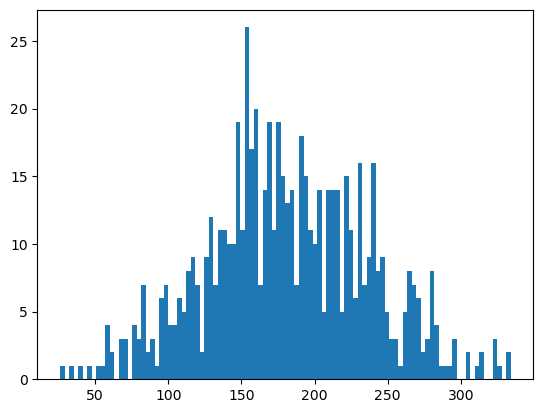

In [26]:
# Import matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Visualize the distribution of 'Total day minutes' 
plt.hist(dataset['Total day minutes'], bins = 100) 

# Display the plot 
plt.show() 


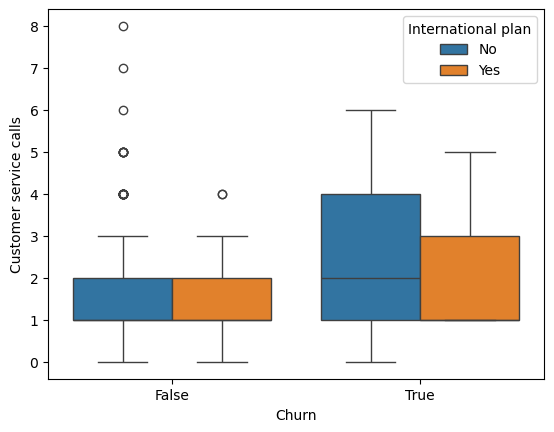

In [28]:
# Create the box plot 
sns.boxplot(x = 'Churn', 
			y = 'Customer service calls', 
			data = dataset, 				 
			hue = "International plan") 
# Display the plot 
plt.show() 


In [29]:
# Features and Labels 
X = dataset.iloc[:, 0:19].values 
y = dataset.iloc[:, 19].values # Churn 
  

In [30]:
# Encoding categorical data in X 
from sklearn.preprocessing import LabelEncoder 
  
labelencoder_X_1 = LabelEncoder() 
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3]) 
  
labelencoder_X_2 = LabelEncoder() 
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4]) 

In [31]:
# Encoding categorical data in y 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 

In [32]:
# Removing extra column to avoid dummy variable trap 
X_State = pd.get_dummies(X[:, 0], drop_first = True) 

In [33]:
# Converting X to a dataframe 
X = pd.DataFrame(X) 

In [34]:
# Dropping the 'State' column 
X = X.drop([0], axis = 1) 

In [35]:
frames = [X_State, X] 
result = pd.concat(frames, axis = 1, ignore_index = True) 

In [36]:
# Final dataset with all numeric features 
X = result 

In [37]:
# Splitting the dataset into the Training and Test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size = 0.2,  
                                                    random_state = 0) 

In [38]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [39]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier 
  

In [40]:
# Instantiate the classifier 
clf = RandomForestClassifier() 
  

In [41]:
# Fit to the training data 
clf.fit(X_train, y_train) 

RandomForestClassifier()

In [42]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 

In [43]:
# Compute accuracy 
from sklearn.metrics import accuracy_score 
  
accuracy_score(y_test, y_pred) 

0.917910447761194

In [44]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 

[[116   1]
 [ 10   7]]
